In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,auc
import matplotlib.pyplot as plt
from scipy.stats import f_oneway,ttest_ind
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [3]:
ThermoPOSData = pd.read_csv("D:/data/MSDial/04-codeOutput/Thermo_results/POS-manipulated.csv", sep=";")
ThermoPOSData = ThermoPOSData[ThermoPOSData['SampleType'].str.contains('sample', case=False, na=False)]
ThermoPOSData = ThermoPOSData.drop(columns=['sample_name','ID', 'Condition','batch', 'Etude ', 'id natif ','Condition','SampleType'])
#ThermoPOSData['Duration'] = ThermoPOSData['Duration'].replace({'C1': 'C', 'C2': 'C'})
ThermoPOSData = ThermoPOSData[~ThermoPOSData['Duration'].str.contains('C1|C2', case=False, na=False)]
ThermoPOSData


,M300T0.975,M300T0.987,M301T1.244,M301T1.133,M301T1.477,M301T2.003,M302T1.199,M302T2.363,M302T1.336,M302T2.724,...,M1194T10.596,M1194T4.213,M1195T14.041,M1197T23.605,M1197T23.537,M1197T9.278,M1198T1.049,M1199T24.051,M1199T16.711,Duration
0,167108.360,0.000,251548.77,0.000,2.808714e+04,103626.170,3905820.2,701766.70,2995879.5,531850.30,...,0.000,44383.695,76286.700,41014.070,36356.715,68371.30,61974.760,24690.547,0.000,H
3,240940.580,70945.016,718569.00,107577.550,7.335554e+05,329695.530,4277937.5,664352.06,3503141.5,594860.40,...,208695.640,0.000,245179.640,62815.875,62815.875,211876.31,0.000,17698.797,72064.350,T
4,309212.280,0.000,737311.06,28440.148,1.372428e+06,711903.700,4722194.5,836862.90,3632363.5,564410.06,...,0.000,0.000,0.000,22163.160,30421.887,160704.10,0.000,0.000,16284.090,H
8,68556.984,8765.258,458501.00,51879.703,1.303577e+05,102192.280,2864743.5,344714.72,2076884.1,336497.62,...,0.000,27128.316,94114.160,34056.297,34056.297,184293.50,0.000,16660.818,131006.336,T
10,20320.309,18904.857,160764.92,0.000,4.076944e+03,41705.297,3984689.0,824290.50,3120559.0,541121.60,...,33696.934,30487.105,134312.250,0.000,36431.812,122226.15,59326.316,13625.674,0.000,T
11,157957.890,0.000,233906.95,0.000,1.333844e+04,35166.348,3552972.0,546407.94,2492591.5,469861.28,...,0.000,20154.154,135231.940,53205.520,53205.520,94570.79,0.000,14433.186,0.000,H
12,108129.290,16648.293,158974.42,12000.326,0.000000e+00,0.000,3370888.8,605110.90,2950398.0,419065.16,...,176053.830,0.000,0.000,57579.824,62651.617,140329.11,45849.016,0.000,0.000,T
13,10472.257,17730.191,674719.70,0.000,0.000000e+00,0.000,2870689.8,540631.56,2803525.5,389353.84,...,0.000,0.000,164268.300,40838.047,35060.320,193230.69,0.000,23634.873,137563.810,T
15,147032.120,0.000,331018.60,620281.600,6.938681e+05,413190.780,3466801.8,484939.66,2267336.2,408597.28,...,0.000,0.000,71073.010,39585.470,39685.370,174804.44,0.000,14930.936,0.000,T
16,88434.270,0.000,726069.06,63717.980,0.000000e+00,0.000,2700247.5,445591.90,2116222.8,328846.47,...,0.000,0.000,116514.484,59654.133,23936.594,259272.77,94648.780,16362.826,47137.582,T


In [50]:
# Split the data into features (X) and target (y)
X = ThermoPOSData.drop(columns=['Duration'])
y = ThermoPOSData['Duration']
#Convert the target variable to numerical values if necessary
y = pd.factorize(y)[0]
print(y)

[0 1 0 1 1 0 1 1 1 1 0 1 1 1 0]


In [51]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled
# Encode the target variable (Duration)
#y_encoded = y.astype('category').cat.codes

array([[-0.10330928, -0.47141503, -1.12770642, ...,  1.26557799,
         0.76683269, -0.76021679],
       [ 0.47782074,  0.96532867,  1.08969323, ..., -0.67645139,
         0.07061615,  0.58788422],
       [ 1.01518416, -0.47141503,  1.17868004, ..., -0.67645139,
        -1.69177453, -0.45559185],
       ...,
       [ 0.54929837, -0.05242694,  0.27154951, ..., -0.67645139,
         0.89338303, -0.24523232],
       [-0.63087604, -0.47141503,  0.60639891, ..., -0.67645139,
        -0.3119471 , -0.22331958],
       [ 0.53336606, -0.47141503,  1.29662036, ..., -0.67645139,
        -0.40304559,  2.03251269]])

In [56]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [57]:
# Define the PLS-DA model with the number of components
n_components = 2
pls_da = PLSRegression(n_components=n_components)

# Fit the model
pls_da.fit(X_train, y_train)

# Predict on the test set
y_pred = pls_da.predict(X_test)

# Convert predicted probabilities to classes
y_pred_classes = (y_pred > 0.5).astype(int)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
roc_auc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_classes))

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("ROC AUC Score:", roc_auc)


Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 2]]
ROC AUC Score: 1.0


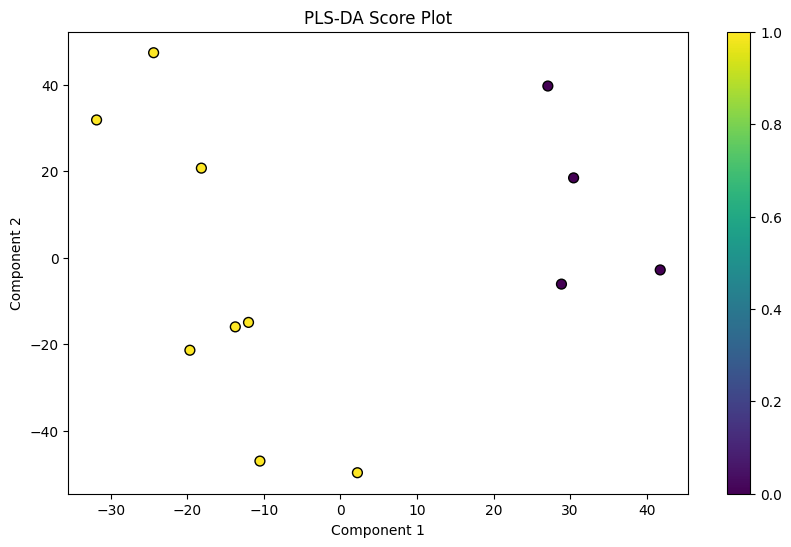

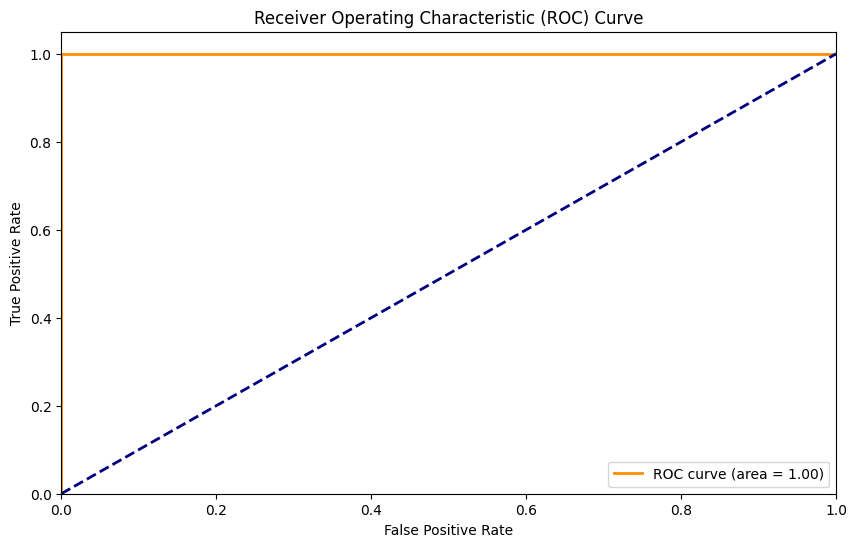

In [58]:

# PLS-DA Score Plot
plt.figure(figsize=(10, 6))
plt.scatter(pls_da.x_scores_[:, 0], pls_da.x_scores_[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PLS-DA Score Plot')
plt.colorbar()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Metabolite Contribution Between The Differance H/T

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 2]]


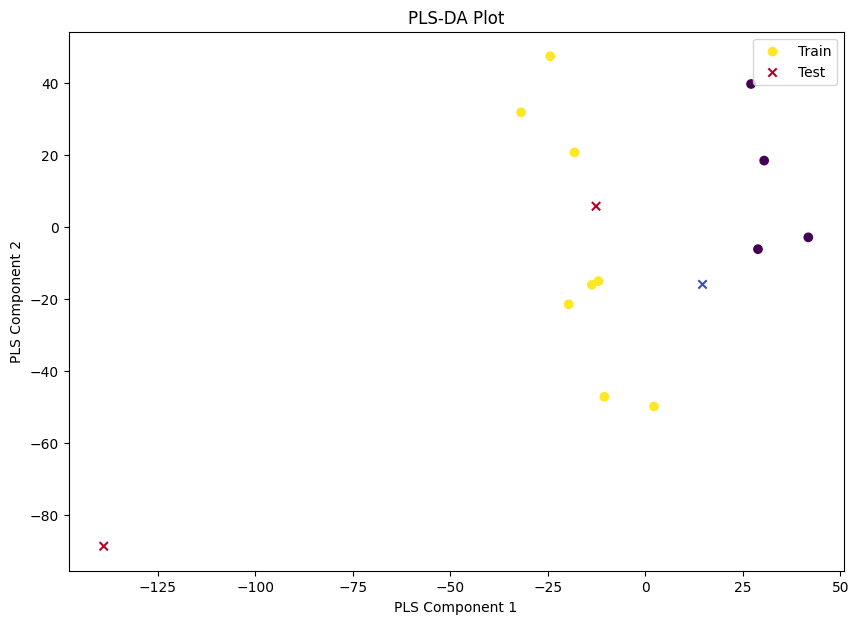

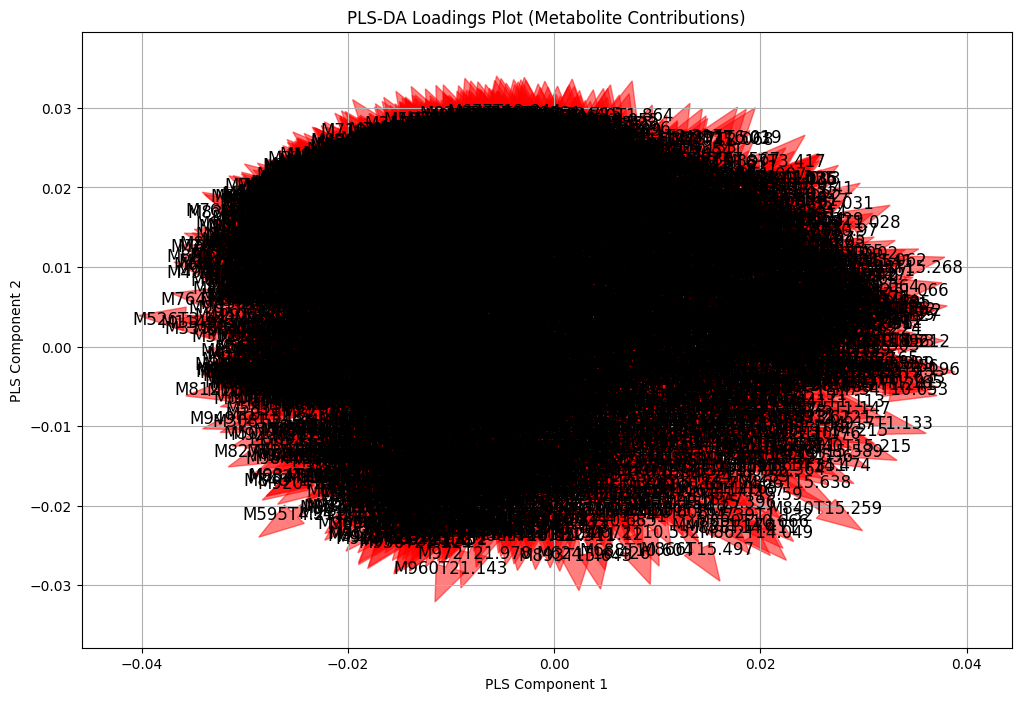

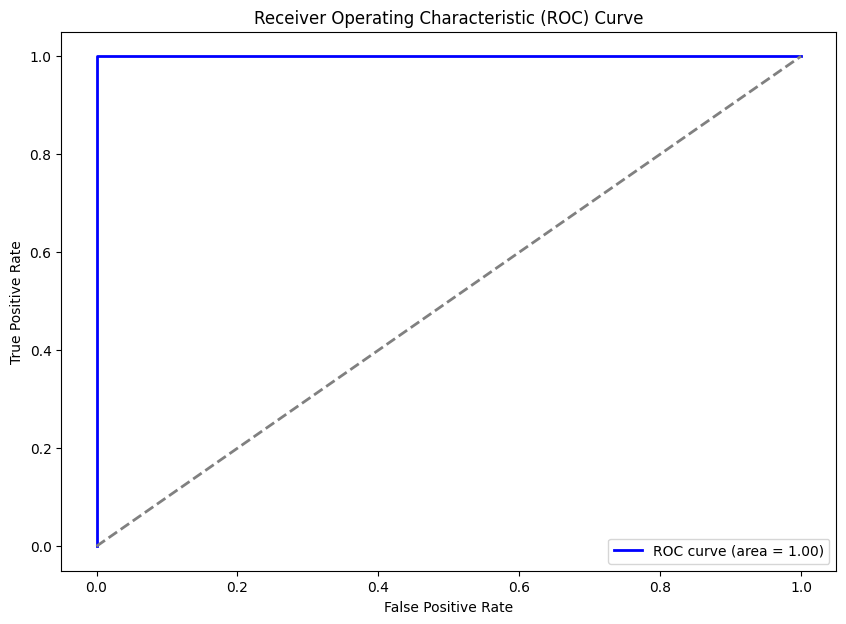

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features (metabolites) and target (Duration)
X = ThermoPOSData.drop('Duration', axis=1)  # Features (metabolites)
y = ThermoPOSData['Duration']  # Target (conditions)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize PLS-DA model with 2 components
pls_da = PLSRegression(n_components=2)

# Fit the model
pls_da.fit(X_train, y_train)

# Transform data to the PLS-DA space
X_train_pls = pls_da.transform(X_train)
X_test_pls = pls_da.transform(X_test)

# Predict on the test set
y_pred = pls_da.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).flatten()

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

# PLS-DA plot
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pls[:, 0], X_train_pls[:, 1], c=y_train, cmap='viridis', label='Train')
plt.scatter(X_test_pls[:, 0], X_test_pls[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Plot')
plt.legend()
plt.show()

# Plotting the loadings (feature contributions)
loadings = pls_da.x_loadings_

plt.figure(figsize=(12, 8))
for i, metabolite in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0], loadings[i, 1], metabolite, fontsize=12, ha='center', va='center')

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Loadings Plot (Metabolite Contributions)')
plt.grid()

# Adjust plot limits
plt.xlim(loadings[:, 0].min() - 0.01, loadings[:, 0].max() + 0.01)
plt.ylim(loadings[:, 1].min() - 0.01, loadings[:, 1].max() + 0.01)

plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

TOP 20 Contributed Metabolites

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 2]]


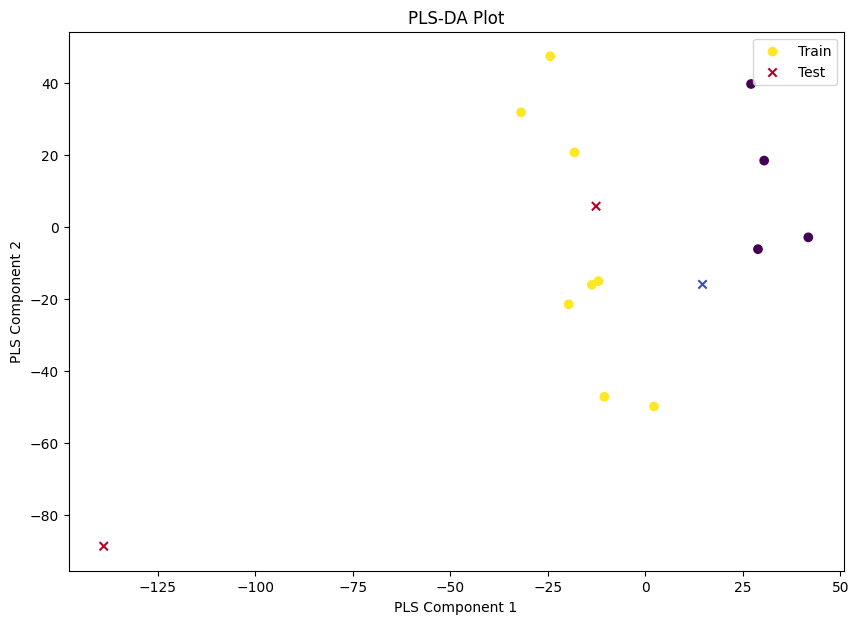

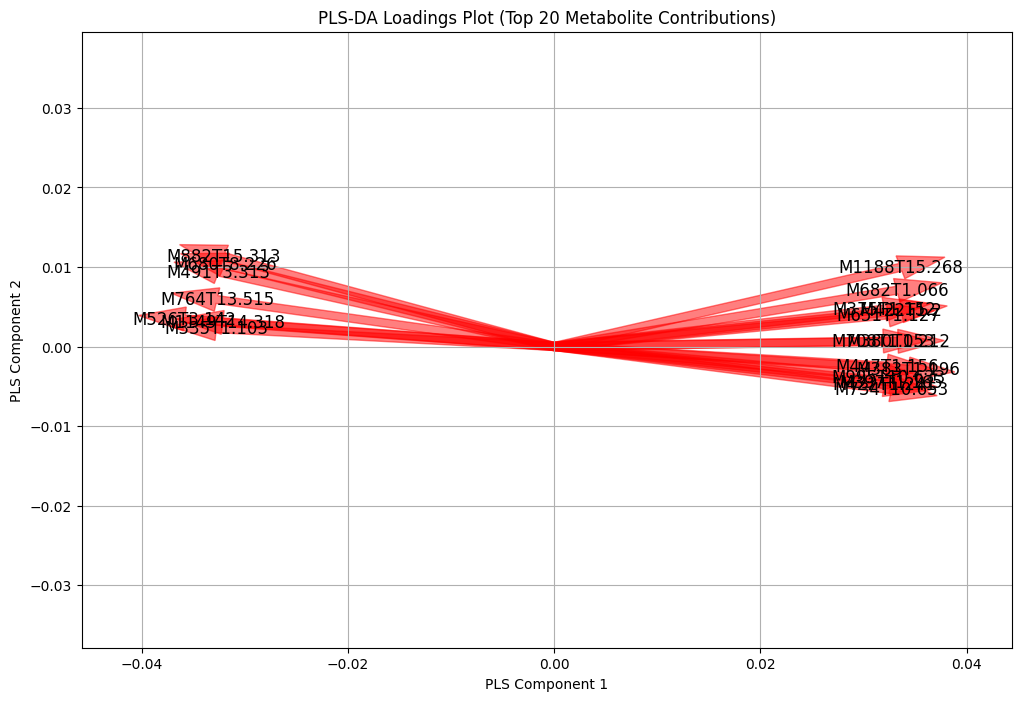

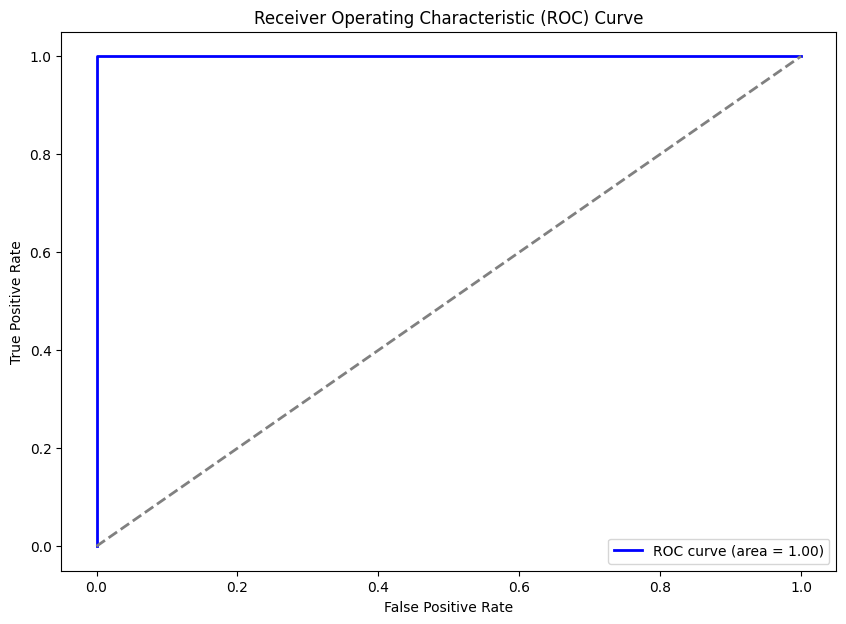

In [22]:
# Separate features (metabolites) and target (Duration)
X = ThermoPOSData.drop('Duration', axis=1)  # Features (metabolites)
y = ThermoPOSData['Duration']  # Target (conditions)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize PLS-DA model with 2 components
pls_da = PLSRegression(n_components=2)

# Fit the model
pls_da.fit(X_train, y_train)

# Transform data to the PLS-DA space
X_train_pls = pls_da.transform(X_train)
X_test_pls = pls_da.transform(X_test)

# Predict on the test set
y_pred = pls_da.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).flatten()

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

# PLS-DA plot
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pls[:, 0], X_train_pls[:, 1], c=y_train, cmap='viridis', label='Train')
plt.scatter(X_test_pls[:, 0], X_test_pls[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Plot')
plt.legend()
plt.show()

# Plotting the loadings (feature contributions)
loadings = pls_da.x_loadings_

# Sort loadings by their magnitude
sorted_indices = np.argsort(np.abs(loadings[:, 0]))[::-1]
top_n = 20  # Number of top metabolites to display
top_indices = sorted_indices[:top_n]

plt.figure(figsize=(12, 8))
for i in top_indices:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0], loadings[i, 1], X.columns[i], fontsize=12, ha='center', va='center')

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Loadings Plot (Top 20 Metabolite Contributions)')
plt.grid()

# Adjust plot limits
plt.xlim(loadings[:, 0].min() - 0.01, loadings[:, 0].max() + 0.01)
plt.ylim(loadings[:, 1].min() - 0.01, loadings[:, 1].max() + 0.01)

plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

LEAST Cntributed Metabolites

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 2]]


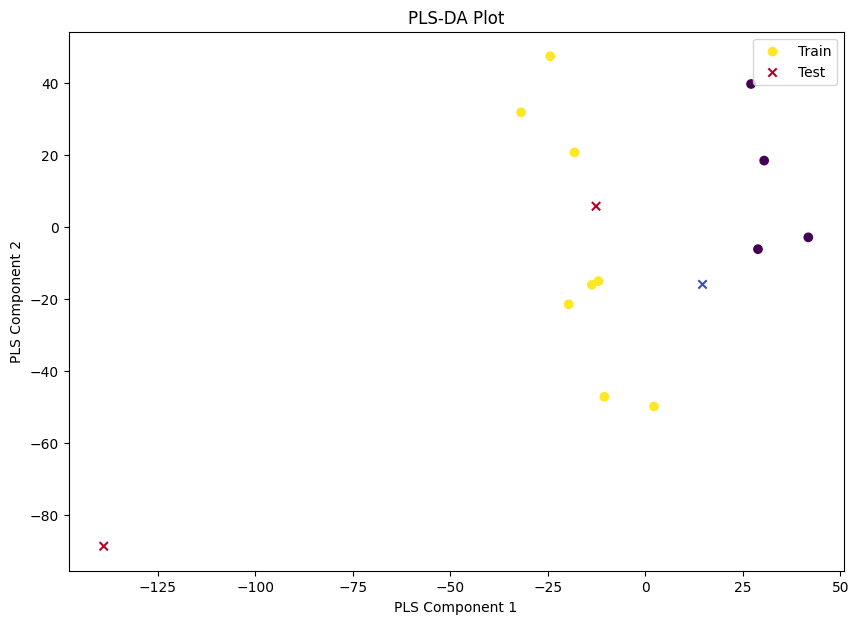

Least Contributed Metabolites:
Index(['M1171T27.671', 'M470T4.594', 'M1016T18.889', 'M932T18.606',
       'M937T19.149', 'M956T19.214', 'M367T0.993', 'M1007T24.172',
       'M1005T23.839', 'M705T17.596', 'M949T1.264', 'M949T18.623',
       'M373T1.012', 'M952T19.182', 'M711T18.562', 'M727T18.573', 'M435T0.992',
       'M877T18.876', 'M1088T23.834', 'M1090T24.143'],
      dtype='object')


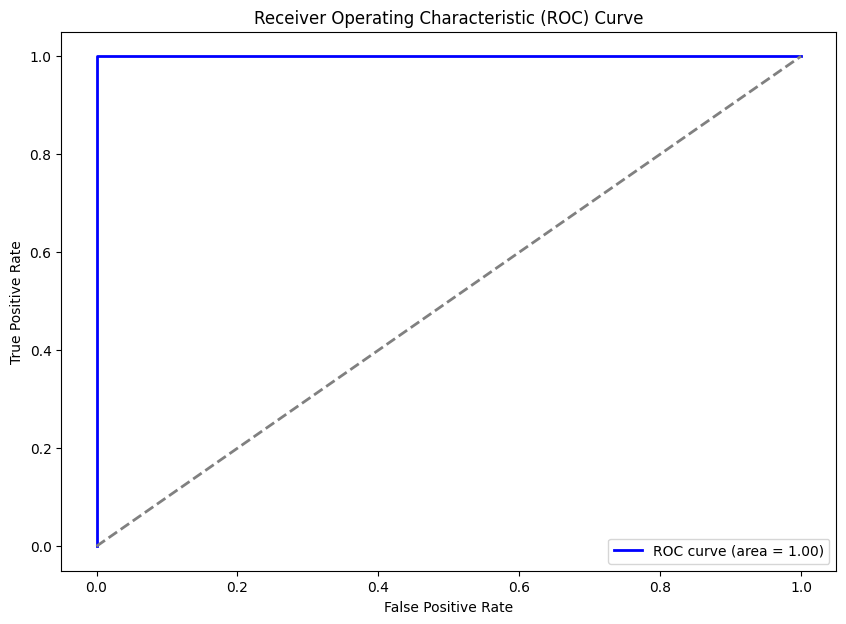

In [26]:
# Separate features (metabolites) and target (Duration)
X = ThermoPOSData.drop('Duration', axis=1)  # Features (metabolites)
y = ThermoPOSData['Duration']  # Target (conditions)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize PLS-DA model with 2 components
pls_da = PLSRegression(n_components=2)

# Fit the model
pls_da.fit(X_train, y_train)

# Transform data to the PLS-DA space
X_train_pls = pls_da.transform(X_train)
X_test_pls = pls_da.transform(X_test)

# Predict on the test set
y_pred = pls_da.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).flatten()

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

# PLS-DA plot
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pls[:, 0], X_train_pls[:, 1], c=y_train, cmap='viridis', label='Train')
plt.scatter(X_test_pls[:, 0], X_test_pls[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Plot')
plt.legend()
plt.show()

# Plotting the loadings (feature contributions)
loadings = pls_da.x_loadings_

# Calculate the magnitude of loadings
loadings_magnitude = np.abs(loadings)

# Sort metabolites by their magnitude (ascending order)
sorted_indices = np.argsort(loadings_magnitude[:, 0])  # Sort by the first component's loadings

# Get the indices of metabolites with the smallest loadings
top_n = 20  # Number of top metabolites to display
bottom_indices = sorted_indices[:top_n]

# Extract the names of the metabolites
least_contributed_metabolites = X.columns[bottom_indices]

print("Least Contributed Metabolites:")
print(least_contributed_metabolites)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



#COMMON METABOLITES H-T

Metabolites Common Between Conditions:
['M300T0.975', 'M302T3.474', 'M308T1.129', 'M310T1.126', 'M319T1.099', 'M322T1.154', 'M324T1.78', 'M335T1.103', 'M348T1.186', 'M351T1.2', 'M352T12.678', 'M359T27.691', 'M362T0.971', 'M366T1.089', 'M366T1.084', 'M367T1.189', 'M371T1.19', 'M371T13.788', 'M375T1.152', 'M378T1.097', 'M380T1.212', 'M380T0.97', 'M383T2.261', 'M383T1.15', 'M383T1.196', 'M387T1.003', 'M389T1.356', 'M389T1.553', 'M391T1.005', 'M394T2.301', 'M395T1.798', 'M397T1.165', 'M398T14.204', 'M403T1.128', 'M404T2.057', 'M405T1.142', 'M408T1.064', 'M409T2.112', 'M422T1.241', 'M422T1.2', 'M422T13.673', 'M424T3.296', 'M424T3.267', 'M426T7.098', 'M432T1.853', 'M432T1.907', 'M445T1.011', 'M446T11.917', 'M447T1.551', 'M447T1.013', 'M447T1.156', 'M448T1.751', 'M450T3.699', 'M451T1.541', 'M451T1.489', 'M451T1.136', 'M452T1.398', 'M457T1.117', 'M457T1.165', 'M459T1.875', 'M467T4.059', 'M467T0.958', 'M468T1.401', 'M468T1.452', 'M473T1.475', 'M473T1.398', 'M473T1.541', 'M473T1.0', 'M474T1.856'

C:\Users\mo-lipidomique.i2mc\AppData\Local\Temp\ipykernel_15020\2069478182.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


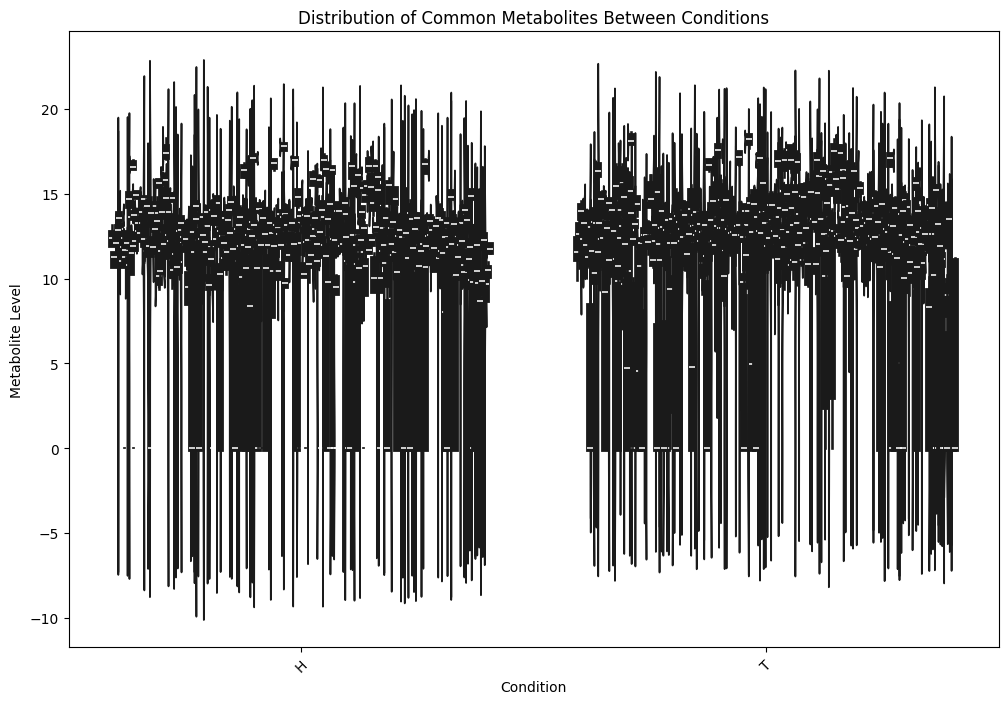

In [7]:
def common_metabolites_detection(df, condition_col, condition1, condition2):
    """
    common_metabolites_detection levels between two conditions, identifies common metabolites, and creates a violin plot.

    Parameters:
    df (DataFrame): The input DataFrame containing metabolite data and condition labels. must contain only the metabolites in column name and a column for the conditions
    condition_col (str): The column name in df that contains condition labels.
    condition1 (str): The first condition to compare (e.g., 'T').
    condition2 (str): The second condition to compare (e.g., 'H').

        Returns:
    common_metabolites (list): List of metabolites that are significantly different between the two conditions.
    """
    
    # Filter samples based on the specified conditions
    condition1_samples = df.loc[df[condition_col] == condition1, :]
    condition2_samples = df.loc[df[condition_col] == condition2, :]

    # Separate features (metabolites) and target (condition labels)
    X = df.drop(condition_col, axis=1)  # Features (metabolites)
    y = df[condition_col]  # Target (conditions)

    # Perform t-test for each metabolite to identify those that differ significantly between conditions
    common_metabolites = []
    for metabolite in X.columns:
        stat, p_value = ttest_ind(condition1_samples[metabolite], condition2_samples[metabolite])
        if p_value < 0.05:  # Significance level for t-test
            common_metabolites.append(metabolite)

    print("Metabolites Common Between Conditions:")
    print(common_metabolites)

    # Extract data for common metabolites from the original DataFrame
    common_metabolites_data = df[common_metabolites]

    # Optionally, apply a log transformation to the data (e.g., log transformation)
    common_metabolites_data = np.log1p(common_metabolites_data)

    # Add the condition column back to the filtered DataFrame
    common_metabolites_data[condition_col] = df[condition_col]

    # Filter the DataFrame to include only the common metabolites and the condition column
    common_metabolites_data = common_metabolites_data[[condition_col] + common_metabolites]

    # Melt the DataFrame to long format for creating a violin plot with seaborn
    common_metabolites_data_melted = common_metabolites_data.melt(id_vars=[condition_col], var_name='Metabolite', value_name='Metabolite Level')

    # Create a violin plot to visualize the distribution of common metabolites between conditions
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=condition_col, y='Metabolite Level', hue='Metabolite', data=common_metabolites_data_melted, palette='viridis', split=True)
    plt.xlabel('Condition')
    plt.ylabel('Metabolite Level')
    plt.title('Distribution of Common Metabolites Between Conditions')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Remove the legend as it may not be useful for interpretation
    plt.legend().remove()

    plt.show()

    return common_metabolites

common_metabolites = common_metabolites_detection(ThermoPOSData, 'Duration', 'T','H')


In [9]:
# Create a new DataFrame with only the common metabolites
common_metabolites_df = ThermoPOSData[common_metabolites]

# Specify the directory where you want to save the CSV file
save_directory = 'D:/data/MSDial/04-codeOutput/Thermo_results/'

# Define the filename for the CSV file
filename = 'common_metabolites_H_T_POS.csv'

# Save the DataFrame to CSV
common_metabolites_df.to_csv(save_directory + filename, index=False)
print(common_metabolites_df)
print(f"Common metabolites saved to: {save_directory}{filename}")

InvalidIndexError: (['M300T0.975', 'M302T3.474', 'M308T1.129', 'M310T1.126', 'M319T1.099', 'M322T1.154', 'M324T1.78', 'M335T1.103', 'M348T1.186', 'M351T1.2', 'M352T12.678', 'M359T27.691', 'M362T0.971', 'M366T1.089', 'M366T1.084', 'M367T1.189', 'M371T1.19', 'M371T13.788', 'M375T1.152', 'M378T1.097', 'M380T1.212', 'M380T0.97', 'M383T2.261', 'M383T1.15', 'M383T1.196', 'M387T1.003', 'M389T1.356', 'M389T1.553', 'M391T1.005', 'M394T2.301', 'M395T1.798', 'M397T1.165', 'M398T14.204', 'M403T1.128', 'M404T2.057', 'M405T1.142', 'M408T1.064', 'M409T2.112', 'M422T1.241', 'M422T1.2', 'M422T13.673', 'M424T3.296', 'M424T3.267', 'M426T7.098', 'M432T1.853', 'M432T1.907', 'M445T1.011', 'M446T11.917', 'M447T1.551', 'M447T1.013', 'M447T1.156', 'M448T1.751', 'M450T3.699', 'M451T1.541', 'M451T1.489', 'M451T1.136', 'M452T1.398', 'M457T1.117', 'M457T1.165', 'M459T1.875', 'M467T4.059', 'M467T0.958', 'M468T1.401', 'M468T1.452', 'M473T1.475', 'M473T1.398', 'M473T1.541', 'M473T1.0', 'M474T1.856', 'M480T4.462', 'M485T13.702', 'M489T1.962', 'M489T2.655', 'M489T2.595', 'M489T1.904', 'M489T3.552', 'M489T3.503', 'M491T3.313', 'M492T1.12', 'M494T1.088', 'M496T1.092', 'M501T1.153', 'M501T1.198', 'M504T1.061', 'M504T1.093', 'M513T4.241', 'M513T12.45', 'M514T1.061', 'M524T3.496', 'M525T2.033', 'M525T1.118', 'M526T3.142', 'M526T3.092', 'M531T3.82', 'M531T9.297', 'M532T1.055', 'M534T2.675', 'M534T1.053', 'M536T14.587', 'M539T2.421', 'M539T12.362', 'M542T1.038', 'M562T1.064', 'M563T1.083', 'M565T11.651', 'M565T1.029', 'M570T1.128', 'M572T1.055', 'M573T1.016', 'M574T2.149', 'M575T1.025', 'M582T1.053', 'M585T4.237', 'M585T4.298', 'M585T1.005', 'M590T2.012', 'M590T3.137', 'M592T1.055', 'M593T1.12', 'M595T4.231', 'M597T15.704', 'M609T3.457', 'M610T1.098', 'M612T1.083', 'M617T7.91', 'M618T4.239', 'M622T1.066', 'M623T8.892', 'M623T1.036', 'M625T1.034', 'M627T14.551', 'M627T15.715', 'M627T1.121', 'M629T1.135', 'M640T9.26', 'M642T4.378', 'M643T1.011', 'M648T16.089', 'M651T1.003', 'M653T1.007', 'M662T22.65', 'M663T15.86', 'M666T11.39', 'M666T24.048', 'M666T1.109', 'M668T7.637', 'M668T1.077', 'M670T1.074', 'M671T20.236', 'M672T1.093', 'M673T16.884', 'M674T2.064', 'M675T12.345', 'M676T6.236', 'M678T1.087', 'M679T15.864', 'M680T8.226', 'M680T1.075', 'M681T1.035', 'M682T1.066', 'M682T15.485', 'M683T1.073', 'M683T1.032', 'M683T1.121', 'M687T11.795', 'M688T16.413', 'M688T1.109', 'M689T13.129', 'M690T18.139', 'M691T13.695', 'M691T1.025', 'M692T9.284', 'M694T24.149', 'M697T12.33', 'M699T17.035', 'M699T16.988', 'M699T1.02', 'M701T12.573', 'M701T1.014', 'M706T20.233', 'M706T10.605', 'M707T9.006', 'M708T1.181', 'M708T1.053', 'M711T13.125', 'M712T1.797', 'M715T13.386', 'M718T15.26', 'M719T1.003', 'M725T13.87', 'M728T1.076', 'M730T1.087', 'M734T10.653', 'M735T22.991', 'M736T15.382', 'M736T1.109', 'M738T14.631', 'M738T1.109', 'M738T1.055', 'M739T12.575', 'M740T14.535', 'M740T13.709', 'M741T1.055', 'M745T7.828', 'M745T1.142', 'M747T13.874', 'M748T20.241', 'M749T15.78', 'M750T15.01', 'M751T1.017', 'M755T14.232', 'M756T1.342', 'M764T14.768', 'M764T13.515', 'M768T16.739', 'M768T15.747', 'M768T15.703', 'M774T10.518', 'M775T14.934', 'M776T18.231', 'M782T19.622', 'M785T16.517', 'M787T1.003', 'M788T1.08', 'M790T15.759', 'M790T13.445', 'M792T13.012', 'M792T12.968', 'M795T1.12', 'M796T14.575', 'M796T14.758', 'M796T1.074', 'M797T1.049', 'M798T10.459', 'M798T10.883', 'M798T1.109', 'M799T16.102', 'M801T2.469', 'M802T12.329', 'M802T12.364', 'M802T17.389', 'M804T12.841', 'M804T12.416', 'M804T12.523', 'M804T12.461', 'M804T1.109', 'M806T15.715', 'M806T1.066', 'M809T10.529', 'M809T1.028', 'M810T17.847', 'M812T14.581', 'M812T14.532', 'M814T13.384', 'M814T1.098', 'M816T13.585', 'M816T1.068', 'M817T16.635', 'M818T14.628', 'M819T1.022', 'M820T14.36', 'M821T15.304', 'M822T13.622', 'M823T14.828', 'M824T15.587', 'M824T14.648', 'M824T14.695', 'M824T1.098', 'M825T1.013', 'M827T15.626', 'M827T14.11', 'M828T13.676', 'M830T12.828', 'M830T12.716', 'M832T13.987', 'M832T13.861', 'M832T13.814', 'M833T15.606', 'M833T16.636', 'M835T17.525', 'M838T17.535', 'M839T12.725', 'M839T12.666', 'M840T15.259', 'M840T15.215', 'M843T14.349', 'M844T13.688', 'M844T13.798', 'M844T1.079', 'M845T13.9', 'M845T18.657', 'M845T1.002', 'M846T1.072', 'M846T13.391', 'M847T15.67', 'M847T19.325', 'M848T1.087', 'M850T13.79', 'M850T13.678', 'M854T13.804', 'M854T13.841', 'M854T12.478', 'M856T1.067', 'M856T13.028', 'M856T13.113', 'M856T16.347', 'M856T16.408', 'M859T1.041', 'M862T16.22', 'M862T1.084', 'M864T16.563', 'M864T1.069', 'M865T15.276', 'M865T21.354', 'M866T1.075', 'M867T13.992', 'M867T17.567', 'M868T13.382', 'M870T13.858', 'M870T15.597', 'M870T12.485', 'M873T16.413', 'M874T16.958', 'M874T1.072', 'M876T13.884', 'M876T1.098', 'M879T14.215', 'M879T14.385', 'M882T15.313', 'M888T19.398', 'M888T19.461', 'M889T14.106', 'M892T17.569', 'M900T12.464', 'M900T12.51', 'M902T21.803', 'M904T14.231', 'M907T15.64', 'M907T22.208', 'M910T22.11', 'M911T14.708', 'M912T13.809', 'M914T1.041', 'M917T15.376', 'M917T1.133', 'M917T21.8', 'M927T1.047', 'M928T13.84', 'M928T13.89', 'M929T0.929', 'M931T22.423', 'M932T20.031', 'M934T0.921', 'M937T22.35', 'M938T17.475', 'M939T22.917', 'M940T1.707', 'M943T19.793', 'M946T17.345', 'M956T21.937', 'M959T21.518', 'M959T21.472', 'M963T22.496', 'M963T1.015', 'M964T21.808', 'M968T17.346', 'M969T15.361', 'M970T16.462', 'M972T1.062', 'M974T1.06', 'M980T21.513', 'M982T21.985', 'M982T21.946', 'M984T14.379', 'M990T21.798', 'M991T14.036', 'M1002T10.595', 'M1007T22.47', 'M1008T1.209', 'M1017T23.518', 'M1019T24.097', 'M1022T1.074', 'M1026T21.798', 'M1037T1.176', 'M1039T1.009', 'M1048T13.826', 'M1048T1.171', 'M1054T1.21', 'M1066T1.181', 'M1069T1.176', 'M1082T14.243', 'M1103T27.576', 'M1127T14.035', 'M1149T14.318', 'M1153T1.199', 'M1159T1.176', 'M1166T2.451', 'M1171T1.243', 'M1176T1.189', 'M1188T15.268'],    Duration  M300T0.975  M302T3.474  M308T1.129  M310T1.126  M319T1.099  \
0         H   12.026404   12.739526   11.444763   11.712290   10.653056   
3         T   12.392310   12.563474   11.796896   12.421562   14.022714   
4         H   12.641787   12.915524   10.804439   10.820396   12.117717   
8         T   11.135435   12.320169   12.751605   12.755690   14.503810   
10        T    9.919425   12.764703   11.837836   11.093723   12.527993   
11        H   11.970090   12.623201    0.000000    0.000000   12.096644   
12        T   11.591092   12.583470   12.985088   12.911247   13.808930   
13        T    9.256580   12.599677   13.173777   13.247552   14.598727   
15        T   11.898413   12.522286   12.194913   10.695074   14.021135   
16        T   11.390026   12.346930   13.580496   13.540371   14.310797   
17        H   13.164022   13.347962   11.295447   12.083315   13.646479   
22        T   12.491153   13.051857   10.652732   11.732421   12.282563   
25        T   12.429307   12.873853   12.484835   12.754061   13.555630   
26        T   11.513748   12.205074   13.200470   13.194458   13.975354   
29        H   12.421178   12.955369   11.370144   11.049255   12.584202   

    M322T1.154  M324T1.78  M335T1.103  M348T1.186  ...  M1082T14.243  \
0    12.401605  12.834380   11.267035   13.593874  ...      0.000000   
3    12.415423  12.818501   13.132830   13.745849  ...     12.830822   
4    12.512679  12.957098   11.501214   13.741727  ...      0.000000   
8    11.588825  12.363981   13.040312   13.225732  ...     11.962749   
10   12.024085  12.848357   10.905019   13.223022  ...      0.000000   
11   11.954672  12.722694   11.131050   13.454392  ...      0.000000   
12   12.128902  12.030012   12.271605   13.408441  ...     11.950254   
13   10.624908  12.259401   13.209941   13.071185  ...      0.000000   
15   11.515274  12.641991   13.051348   13.336052  ...     11.851436   
16   11.491277  12.348773   13.004896   13.226273  ...     12.096094   
17   12.638268  13.105272   11.352932   14.060580  ...      0.000000   
22   11.791797  12.808803   12.111660   13.728937  ...     12.340402   
25   11.940156  12.287779   12.661144   13.642333  ...      0.000000   
26   11.269955  12.073091   13.058794   13.078994  ...      0.000000   
29   12.120064  12.880504   11.149825   13.529079  ...      0.000000   

    M1103T27.576  M1127T14.035  M1149T14.318  M1153T1.199  M1159T1.176  \
0       9.236200     10.907265     12.514192    10.090615    10.103368   
3       0.000000      0.000000     13.652103     0.000000     0.000000   
4       8.030556      0.000000     12.907529     0.000000     0.000000   
8       0.000000      0.000000     13.912668     0.000000     9.447331   
10      0.000000      0.000000     13.432694     9.903391     0.000000   
11      0.000000     10.435840     12.296803     9.421678     9.685438   
12      0.000000      0.000000     13.629388     7.454254     0.000000   
13      0.000000      0.000000     13.791342     0.000000     0.000000   
15      0.000000      0.000000     13.057033     0.000000     0.000000   
16      0.000000      0.000000     12.830712     0.000000     0.000000   
17      9.483259     11.251080     12.144912    10.061190    10.269914   
22      0.000000      0.000000     13.130440     0.000000     9.200922   
25      0.000000      0.000000     13.891681    10.009527     0.000000   
26      7.223379      0.000000     12.414073     0.000000     0.000000   
29      8.886814      0.000000     12.167855     9.752546     8.814937   

    M1166T2.451  M1171T1.243  M1176T1.189  M1188T15.268  
0      9.617185    10.969389     9.866861     11.649530  
3      0.000000     0.000000     0.000000      0.000000  
4      0.000000    10.587122     9.978572     11.510349  
8      0.000000     9.813307     0.000000      0.000000  
10     0.000000     0.000000     9.530759      0.000000  
11     8.653720     0.000000    10.890779     12.004882  
12     0.000000    10.057336     0.000000      0.000000  
13     0.000000     0.000000    10.202432      0.000000  
15     0.000000     0.000000     0.000000     11.002848  
16     0.000000     0.000000     0.000000     11.001899  
17     7.839114    10.531593     8.435420     11.922945  
22     0.000000    10.106344     0.000000     11.194908  
25     0.000000     0.000000     0.000000     11.000811  
26     9.184640     0.000000     8.209769      0.000000  
29     8.745896    10.207472     9.712227     11.721786  

[15 rows x 401 columns])